<a href="https://colab.research.google.com/github/satro1/ML_Projects/blob/main/02_SpecialFunctionRegression/Special_Function_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generate a dataset
Generate data points using sin, cos, tan, exponential, log, cubic, square, and linear functions

In [29]:
import numpy as np
import pandas as pd

df = pd.DataFrame(columns=['sin', 'cos', 'tan', 'exp', 'log', 'cubic', 'square', 'linear', 'y'])
coefficients = [1, -1, 0.5, -0.5, 1.5, -1.5, 1, -1]
for i in range(5000):
    x = np.random.uniform(0, 5)
    y = coefficients[0] * np.sin(x) + coefficients[1] * np.cos(x) + coefficients[2] * np.tan(x) + coefficients[3] * np.exp(x) + coefficients[4] * np.log(x) + coefficients[5] * x**3 + coefficients[6] * x**2 + coefficients[7] * x
    df.loc[i] = [np.sin(x), np.cos(x), np.tan(x), np.exp(x), np.log(np.abs(x)), x**3, x**2, x, y]

# Remove outliers
q3 = df['y'].quantile(0.75)
q1 = df['y'].quantile(0.25)
df = df[(df['y'] >= q1 - 1.5 * (q3 - q1)) & (df['y'] <= q3 + 1.5 * (q3 - q1))]
print("Num records:", len(df))
df.head()

Num records: 4698


,sin,cos,tan,exp,log,cubic,square,linear,y
0,-0.220837,-0.975311,0.226428,28.912259,1.213210,38.077713,11.318284,3.364266,-60.931179
1,0.275573,0.961280,0.286673,1.322053,-1.275877,0.021761,0.077945,0.279186,-3.351095
3,0.982675,-0.185340,-5.302023,5.796265,0.563729,5.425925,3.087800,1.757214,-10.343836
4,0.876017,-0.482280,-1.816406,7.957002,0.729504,8.921937,4.301693,2.074052,-13.589414
5,0.779971,-0.625815,-1.246328,9.459057,0.809584,11.344710,5.048886,2.246973,-16.947682


## Visualize the dataset

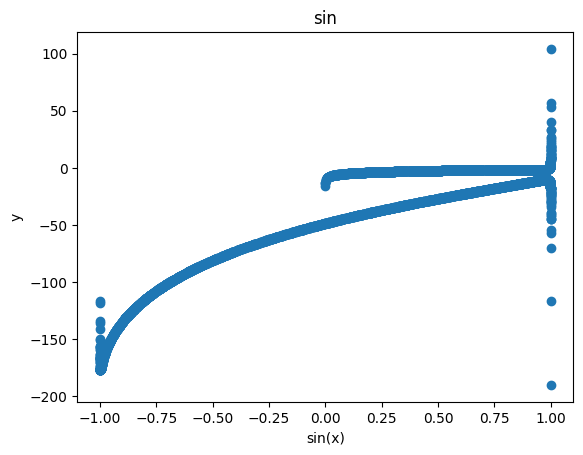

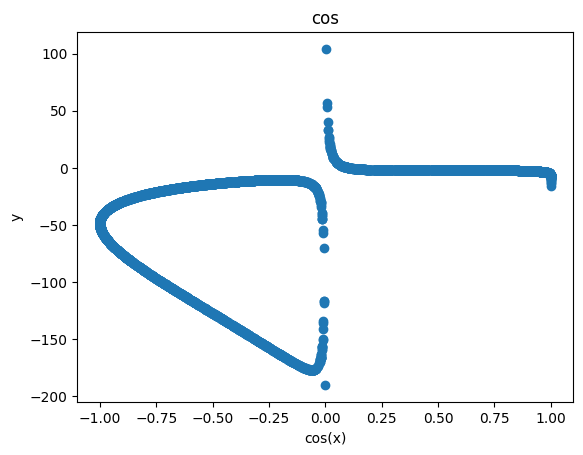

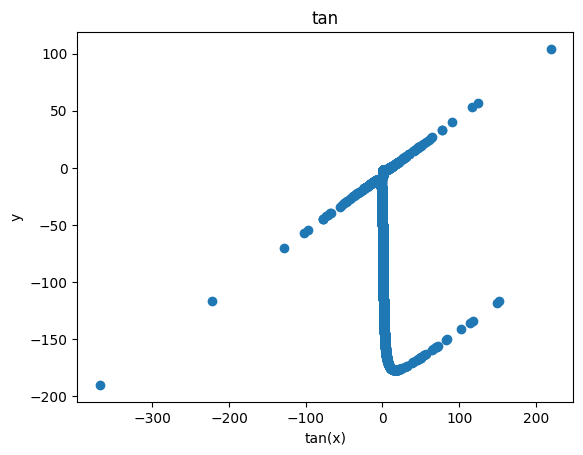

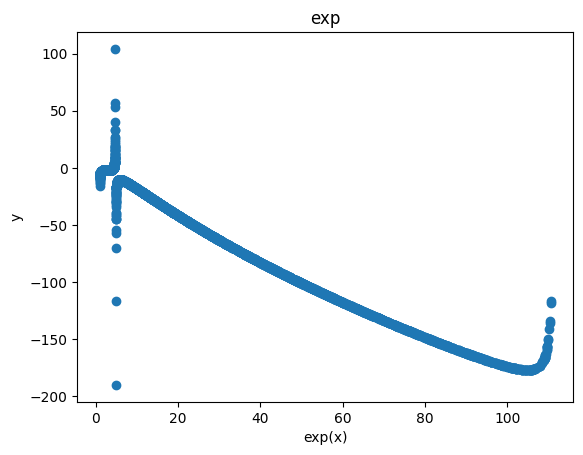

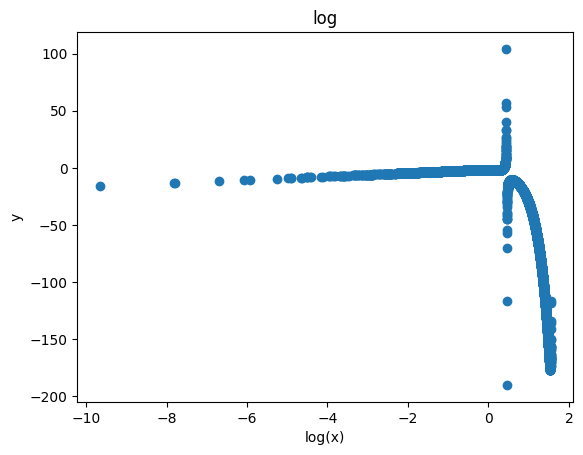

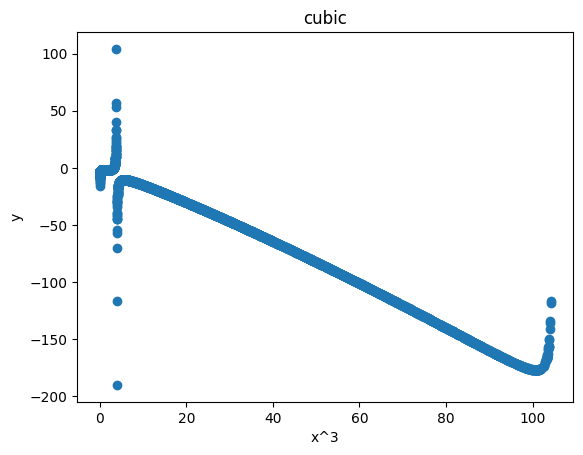

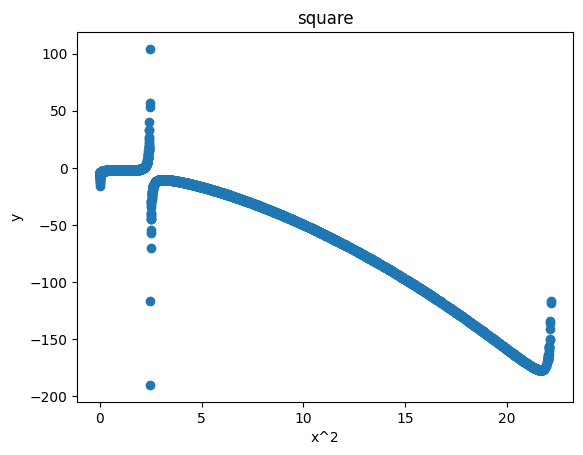

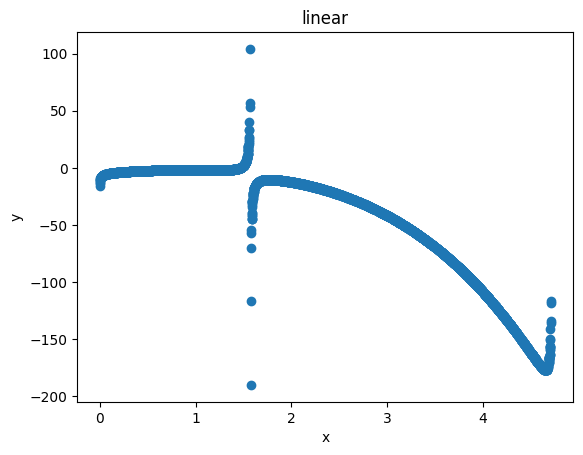

In [30]:
import matplotlib.pyplot as plt

def plot(title, x, y, xlabel, ylabel):
  plt.figure()
  plt.title(title)
  plt.scatter(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

plot("sin", df['sin'], df['y'], "sin(x)", "y")
plot("cos", df['cos'], df['y'], "cos(x)", "y")
plot("tan", df['tan'], df['y'], "tan(x)", "y")
plot("exp", df['exp'], df['y'], "exp(x)", "y")
plot("log", df['log'], df['y'], "log(x)", "y")
plot("cubic", df['cubic'], df['y'], "x^3", "y")
plot("square", df['square'], df['y'], "x^2", "y")
plot("linear", df['linear'], df['y'], "x", "y")

## Prepare the data

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.array(df[['sin', 'cos', 'tan', 'exp', 'log', 'cubic', 'square', 'linear']])
Y = np.array(df['y']).reshape(-1, 1)
print("X shape", X.shape)
print("Y shape", Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train shape", X_train.shape)
print("Y_train shape", Y_train.shape)
print("X_test shape", X_test.shape)
print("Y_test shape", Y_test.shape)
print("m =", X_train.shape[1])
print("n =", X_train.shape[0])


X shape (4698, 8)
Y shape (4698, 1)
X_train shape (3758, 8)
Y_train shape (3758, 1)
X_test shape (940, 8)
Y_test shape (940, 1)
m = 8
n = 3758


## Model this relationshop using Least Squares with the special functions

y = a$_1$sin(x$_1)$ + a$_2$cos(x$_2)$ + a$_3$tan(x$_3)$ + a$_4$e$^{x_4}$ + a$_5$log(|x$_5|)$ + a$_6$x$_6^3$ + a$_7$x$_7^2$ + a$_8$x$_8$ + b\
$\implies$
$\vec{Y}$ = $\begin{bmatrix}x_{11}^2 & ... & x_{1m}^2 & x_{11} & ... & x_{1m} \\ ... & ... & ... & ... & ... & ... \\ x_{n1}^2 & ... & x_{nm}^2 & x_{n1} & ... & x_{nm}\end{bmatrix}$$\begin{bmatrix}a_1\\...\\a_{2m}\end{bmatrix}$ + $\begin{bmatrix}b\\...\\b\end{bmatrix}$\
$\implies$
$\vec{Y}$ = $\begin{bmatrix}1 & x_{11}^2 & ... & x_{1m}^2 & x_{11} & ... & x_{1m} \\ ... & ... & ... & ... & ... & ... & ... \\ 1 & x_{n1}^2 & ... & x_{nm}^2 & x_{n1} & ... & x_{nm}\end{bmatrix}$$\begin{bmatrix}b\\a_1\\...\\a_{2m}\end{bmatrix}$\
$\implies$
$\vec{Y}$ = X$\vec{A}$\
Using Least Squares:\
$\widehat{\vec{A}}$ = (X$^T$X)$^{-1}$X$^T$$\vec{Y}$ and\
$\widehat{\vec{Y}}$ = X$\widehat{\vec{A}}$

In [32]:
temp = np.hstack((np.ones((X_train.shape[0], 1)), np.sin(X_train[:, 0]).reshape(-1, 1)))
temp = np.hstack((temp, np.cos(X_train[:, 1]).reshape(-1, 1)))
temp = np.hstack((temp, np.tan(X_train[:, 2]).reshape(-1, 1)))
temp = np.hstack((temp, np.exp(X_train[:, 3]).reshape(-1, 1)))
temp = np.hstack((temp, np.log(np.abs(X_train[:, 4])).reshape(-1, 1)))
temp = np.hstack((temp, X_train[:, 5].reshape(-1, 1) ** 3))
temp = np.hstack((temp, X_train[:, 6].reshape(-1, 1) ** 2))
X_train = np.hstack((temp, X_train[:, 7].reshape(-1, 1)))

temp = np.hstack((np.ones((X_test.shape[0], 1)), np.sin(X_test[:, 0]).reshape(-1, 1)))
temp = np.hstack((temp, np.cos(X_test[:, 1]).reshape(-1, 1)))
temp = np.hstack((temp, np.tan(X_test[:, 2]).reshape(-1, 1)))
temp = np.hstack((temp, np.exp(X_test[:, 3]).reshape(-1, 1)))
temp = np.hstack((temp, np.log(np.abs(X_test[:, 4])).reshape(-1, 1)))
temp = np.hstack((temp, X_test[:, 5].reshape(-1, 1) ** 3))
temp = np.hstack((temp, X_test[:, 6].reshape(-1, 1) ** 2))
X_test = np.hstack((temp, X_test[:, 7].reshape(-1, 1)))

A_hat = np.dot(np.dot(np.linalg.inv(np.dot(X_train.T, X_train)), X_train.T), Y_train)
print("Weights:\n", A_hat)
print("X_train shape:", X_train.shape)

Weights:
 [[-2.71929824e+00]
 [ 7.66431591e+00]
 [-2.68469712e+00]
 [-2.46879758e-03]
 [ 6.54785605e-47]
 [-9.18169147e-01]
 [ 3.71993620e-06]
 [-3.24247781e-01]
 [-4.12379913e+00]]
X_train shape: (3758, 9)


## Test the model

In [33]:
Y_hat = np.dot(X_test, A_hat)
print("Predicted:\n", Y_hat[:6])
print("Actual:\n", Y_test[:6])
errors = np.abs(Y_hat - Y_test)
print("Errors:\n", errors[:6])
print("Mean error:", np.mean(errors))

Predicted:
 [[-120.91624072]
 [ -46.96376862]
 [-154.7554879 ]
 [  -5.81030054]
 [ -35.47772495]
 [  -4.58990173]]
Actual:
 [[-121.01815401]
 [ -46.91676554]
 [-156.05671684]
 [   0.945559  ]
 [ -35.67139077]
 [  -4.9308486 ]]
Errors:
 [[0.1019133 ]
 [0.04700308]
 [1.30122894]
 [6.75585954]
 [0.19366583]
 [0.34094687]]
Mean error: 1.277823579783769


## Plot residual error

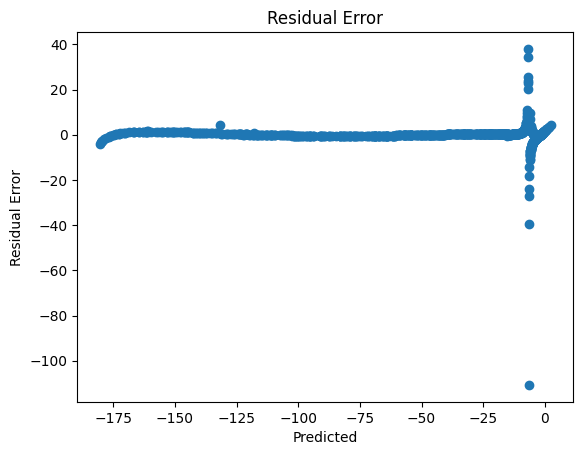

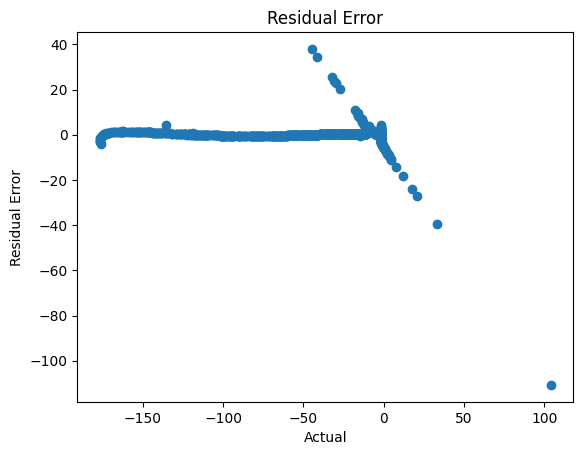

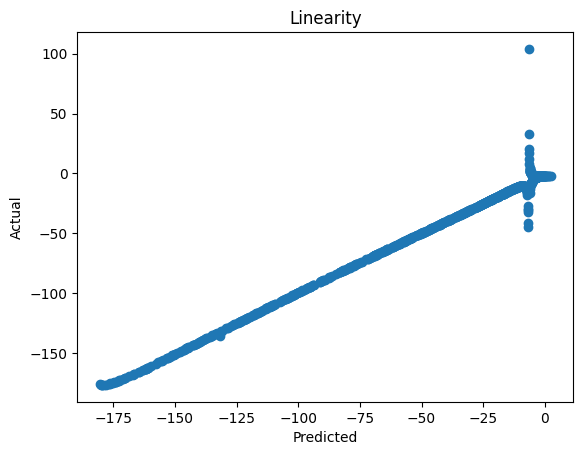

In [34]:
plot("Residual Error", Y_hat, Y_hat - Y_test, "Predicted", "Residual Error")
plot("Residual Error", Y_test, Y_hat - Y_test, "Actual", "Residual Error")
plot("Linearity", Y_hat, Y_test, "Predicted", "Actual")